In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [2]:
# 1.Data Collection 

In [3]:
now = datetime.now()

start = datetime(now.year - 10, now.month, now.day)  # correct constructor
end = now
ticker = "AAPL"

df = yf.download(ticker, start, end, auto_adjust=True)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-27,25.376007,25.447919,24.724303,25.220948,338464400
2015-08-28,25.459154,25.463648,25.065884,25.207461,212657600
2015-08-31,25.340055,25.737819,25.169264,25.176005,224917200
2015-09-01,24.207436,25.142293,24.126534,24.753519,307383600
2015-09-02,25.245672,25.245672,24.524303,24.771503,247555200


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-27,25.376007,25.447919,24.724303,25.220948,338464400
2015-08-28,25.459154,25.463648,25.065884,25.207461,212657600
2015-08-31,25.340055,25.737819,25.169264,25.176005,224917200
2015-09-01,24.207436,25.142293,24.126534,24.753519,307383600
2015-09-02,25.245672,25.245672,24.524303,24.771503,247555200


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-08-21,224.899994,226.520004,223.779999,226.270004,30621200
2025-08-22,227.759995,229.089996,225.410004,226.169998,42477800
2025-08-25,227.160004,229.300003,226.229996,226.479996,30983100
2025-08-26,229.309998,229.490005,224.690002,226.869995,54524400
2025-08-27,228.770004,230.250000,228.294998,228.580002,3697081


In [6]:
#2. DATA EXPLORATION AND VISULISATION

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(2515, 5)

In [9]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [10]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,106.208806,107.273962,105.034601,106.107846,1.066954e+08
std,69.573305,70.257143,68.809468,69.499643,6.030472e+07
min,20.624050,20.927680,20.425436,20.546430,3.697081e+06
25%,40.100868,40.468148,39.741875,40.036407,6.544095e+07
50%,109.070839,110.670953,106.998946,109.528007,9.252240e+07
75%,167.330605,168.778087,165.801897,167.453353,1.301676e+08
max,258.103729,259.179926,256.718662,257.276679,5.334788e+08


In [11]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [12]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-27,25.376007,25.447919,24.724303,25.220948,338464400
2015-08-28,25.459154,25.463648,25.065884,25.207461,212657600
2015-08-31,25.340055,25.737819,25.169264,25.176005,224917200
2015-09-01,24.207436,25.142293,24.126534,24.753519,307383600
2015-09-02,25.245672,25.245672,24.524303,24.771503,247555200


In [13]:
df=df.reset_index()

In [14]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-27,25.376007,25.447919,24.724303,25.220948,338464400
1,2015-08-28,25.459154,25.463648,25.065884,25.207461,212657600
2,2015-08-31,25.340055,25.737819,25.169264,25.176005,224917200
3,2015-09-01,24.207436,25.142293,24.126534,24.753519,307383600
4,2015-09-02,25.245672,25.245672,24.524303,24.771503,247555200


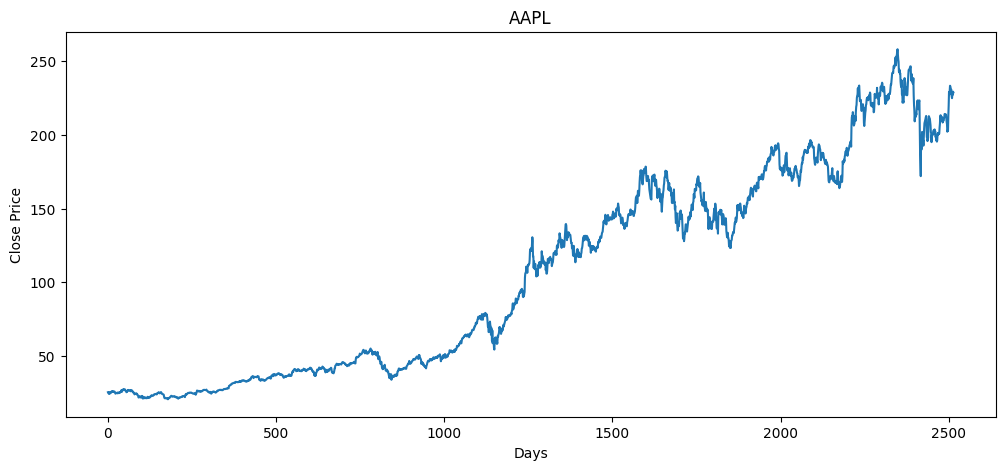

In [15]:

plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.show()


In [16]:
# 3. Feature Engineering 

In [17]:
temp_df=[10,20,30,40,50,60,70,80,90,100]
print(sum(temp_df[2:7])/5)

50.0


In [18]:
df1=pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [19]:
df1['MA_5']=df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
### 100 days moving average

In [21]:
df['MA_100']=df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-27,25.376007,25.447919,24.724303,25.220948,338464400,NaN
1,2015-08-28,25.459154,25.463648,25.065884,25.207461,212657600,NaN
2,2015-08-31,25.340055,25.737819,25.169264,25.176005,224917200,NaN
3,2015-09-01,24.207436,25.142293,24.126534,24.753519,307383600,NaN
4,2015-09-02,25.245672,25.245672,24.524303,24.771503,247555200,NaN


In [22]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-27,25.376007,25.447919,24.724303,25.220948,338464400,NaN
1,2015-08-28,25.459154,25.463648,25.065884,25.207461,212657600,NaN
2,2015-08-31,25.340055,25.737819,25.169264,25.176005,224917200,NaN
3,2015-09-01,24.207436,25.142293,24.126534,24.753519,307383600,NaN
4,2015-09-02,25.245672,25.245672,24.524303,24.771503,247555200,NaN
...,...,...,...,...,...,...,...
98,2016-01-19,21.814955,22.264072,21.553156,22.209908,212350800,NaN
99,2016-01-20,21.844299,22.160262,21.083732,21.462887,289337600,25.248339
100,2016-01-21,21.733707,22.090292,21.426772,21.905229,208646000,25.211916


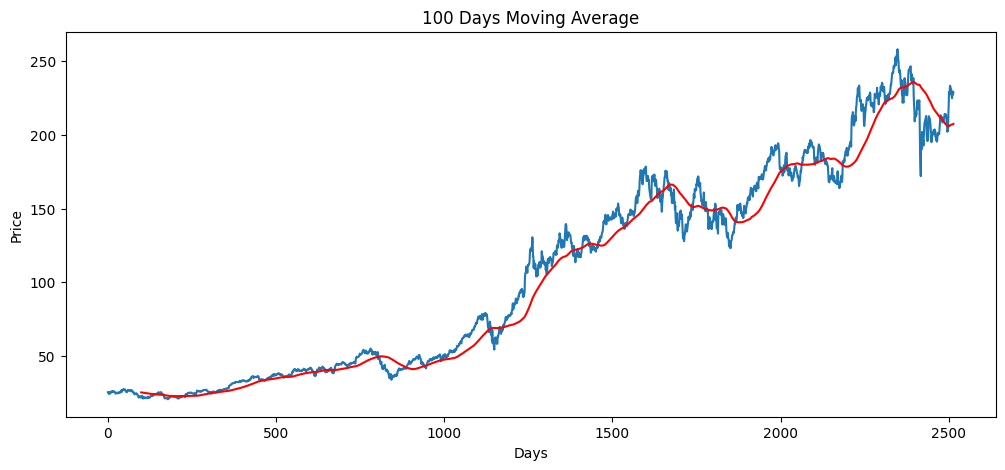

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [24]:
#200 days moving average

In [25]:
df['MA_200']=df.Close.rolling(200).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-27,25.376007,25.447919,24.724303,25.220948,338464400,NaN,NaN
1,2015-08-28,25.459154,25.463648,25.065884,25.207461,212657600,NaN,NaN
2,2015-08-31,25.340055,25.737819,25.169264,25.176005,224917200,NaN,NaN
3,2015-09-01,24.207436,25.142293,24.126534,24.753519,307383600,NaN,NaN
4,2015-09-02,25.245672,25.245672,24.524303,24.771503,247555200,NaN,NaN


In [26]:
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-27,25.376007,25.447919,24.724303,25.220948,338464400,NaN,NaN
1,2015-08-28,25.459154,25.463648,25.065884,25.207461,212657600,NaN,NaN
2,2015-08-31,25.340055,25.737819,25.169264,25.176005,224917200,NaN,NaN
3,2015-09-01,24.207436,25.142293,24.126534,24.753519,307383600,NaN,NaN
4,2015-09-02,25.245672,25.245672,24.524303,24.771503,247555200,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-06-10,22.562267,22.680979,22.482365,22.493778,126851600,22.741683,NaN
199,2016-06-13,22.222101,22.628465,22.167311,22.530299,152082000,22.745461,23.996900
200,2016-06-14,22.249502,22.482363,22.087414,22.217541,127727600,22.750619,23.981267


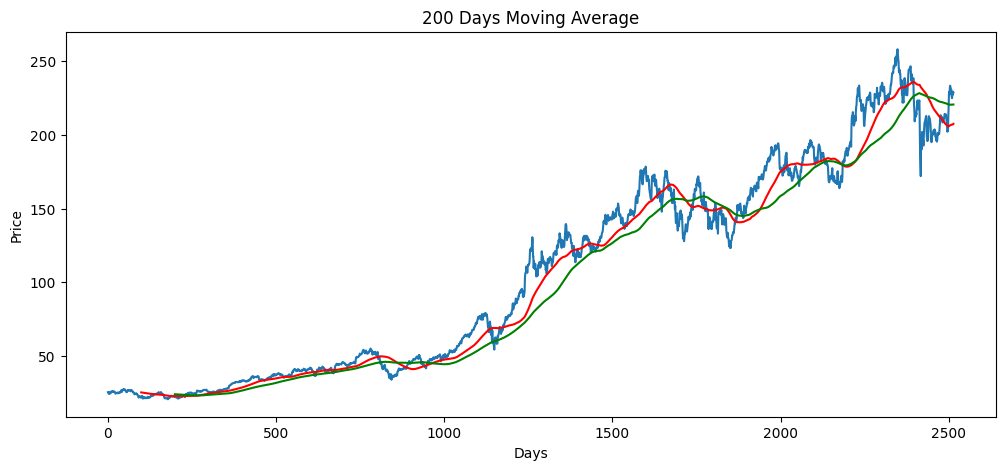

In [27]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.plot(df['MA_200'],'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [28]:
#calculationg % changed in each trading session


In [29]:
df['Percentage Changed']=df.Close.pct_change()
df[['Close','Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,25.376007,NaN
1,25.459154,0.003277
2,25.340055,-0.004678
3,24.207436,-0.044697
4,25.245672,0.042889
...,...,...
2510,224.899994,-0.004911
2511,227.759995,0.012717
2512,227.160004,-0.002634


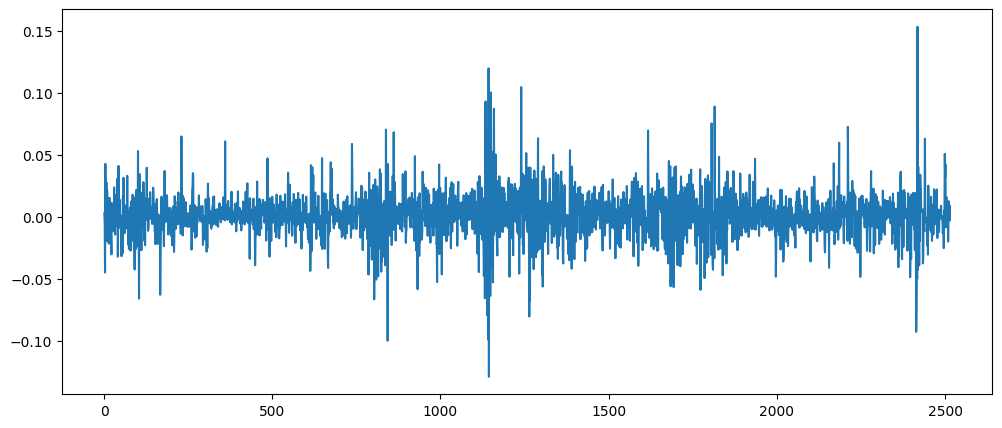

In [30]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

In [31]:
#Data PreProcessing

In [32]:
df.shape

(2515, 9)

In [33]:
data_training=pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])
print(data_training)
print(data_testing)

Ticker        AAPL
0        25.376007
1        25.459154
2        25.340055
3        24.207436
4        25.245672
...            ...
1755    171.837463
1756    171.443695
1757    168.854568
1758    164.965942
1759    164.631210

[1760 rows x 1 columns]
Ticker        AAPL
1760    164.926559
1761    167.387711
1762    161.077332
1763    158.872147
1764    156.440506
...            ...
2510    224.899994
2511    227.759995
2512    227.160004
2513    229.309998
2514    228.770004

[755 rows x 1 columns]


In [34]:
data_training

Ticker,AAPL
0,25.376007
1,25.459154
2,25.340055
3,24.207436
4,25.245672
...,...
1755,171.837463
1756,171.443695
1757,168.854568
1758,164.965942


In [35]:
data_testing

Ticker,AAPL
1760,164.926559
1761,167.387711
1762,161.077332
1763,158.872147
1764,156.440506
...,...
2510,224.899994
2511,227.759995
2512,227.160004
2513,229.309998


In [36]:
#Scaling down the data between 0 and 1

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [38]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.03011015],
       [0.030637  ],
       [0.02988234],
       ...,
       [0.93924306],
       [0.91460329],
       [0.91248231]])

In [39]:
type(data_training_array)

numpy.ndarray

In [40]:
data_training_array.shape

(1760, 1)

In [41]:
#Sequence Creation

In [42]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train), np.array(y_train)

In [43]:
x_train

array([[[0.03011015],
        [0.030637  ],
        [0.02988234],
        ...,
        [0.00821809],
        [0.00754601],
        [0.00773195]],

       [[0.030637  ],
        [0.02988234],
        [0.02270565],
        ...,
        [0.00754601],
        [0.00773195],
        [0.0070312 ]],

       [[0.02988234],
        [0.02270565],
        [0.0292843 ],
        ...,
        [0.00773195],
        [0.0070312 ],
        [0.01435298]],

       ...,

       [[0.96156943],
        [0.98246893],
        [0.97506718],
        ...,
        [0.94866223],
        [0.95814377],
        [0.95564871]],

       [[0.98246893],
        [0.97506718],
        [0.95541164],
        ...,
        [0.95814377],
        [0.95564871],
        [0.93924306]],

       [[0.97506718],
        [0.95541164],
        [0.95354552],
        ...,
        [0.95564871],
        [0.93924306],
        [0.91460329]]])

In [44]:
x_train.ndim

3

In [45]:
y_train.ndim

1

In [46]:
##Model Building (using tensor flow)

In [48]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [50]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input



In [54]:
model=Sequential()
model.add(Input(shape=(100,1)))
model.add(LSTM(units=128,activation='tanh',return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#7.Model training

In [56]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 14s 171ms/step - loss: 0.0120
Epoch 2/50
52/52 [==============================] - 9s 170ms/step - loss: 5.4761e-04
Epoch 3/50
52/52 [==============================] - 8s 152ms/step - loss: 5.1285e-04
Epoch 4/50
52/52 [==============================] - 9s 163ms/step - loss: 5.4640e-04
Epoch 5/50
52/52 [==============================] - 8s 154ms/step - loss: 5.1246e-04
Epoch 6/50
52/52 [==============================] - 8s 146ms/step - loss: 4.5093e-04
Epoch 7/50
52/52 [==============================] - 8s 146ms/step - loss: 4.5610e-04
Epoch 8/50
52/52 [==============================] - 7s 135ms/step - loss: 5.2268e-04
Epoch 9/50
52/52 [==============================] - 8s 149ms/step - loss: 4.1585e-04
Epoch 10/50
52/52 [==============================] - 8s 144ms/step - loss: 4.2965e-04
Epoch 11/50
52/52 [==============================] - 8s 147ms/step - loss: 4.0875e-04
Epoch 12/50
52/52 [==============================] - 8s 145ms/step

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [59]:
#save the trained model
model.save('stock_prediction_model.keras')

In [62]:
#Testing Data

In [63]:
data_training


Ticker,AAPL
0,25.376007
1,25.459154
2,25.340055
3,24.207436
4,25.245672
...,...
1755,171.837463
1756,171.443695
1757,168.854568
1758,164.965942


In [61]:
data_testing

Ticker,AAPL
1760,164.926559
1761,167.387711
1762,161.077332
1763,158.872147
1764,156.440506
...,...
2510,224.899994
2511,227.759995
2512,227.160004
2513,229.309998


In [64]:
past_100_days=data_training.tail(100)

In [65]:
past_100_days

Ticker,AAPL
1660,171.406281
1661,171.111771
1662,175.166016
1663,171.847992
1664,168.677246
...,...
1755,171.837463
1756,171.443695
1757,168.854568
1758,164.965942


In [66]:
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)
final_df

Ticker,AAPL
0,171.406281
1,171.111771
2,175.166016
3,171.847992
4,168.677246
...,...
850,224.899994
851,227.759995
852,227.160004
853,229.309998


In [67]:
input_data=scaler.fit_transform(final_df)

In [68]:
input_data

array([[3.56950650e-01],
       [3.54766222e-01],
       [3.84837229e-01],
       [3.60226897e-01],
       [3.36708950e-01],
       [3.38966038e-01],
       [3.24039920e-01],
       [2.92440118e-01],
       [3.06346851e-01],
       [3.26297121e-01],
       [2.89090646e-01],
       [2.87488852e-01],
       [3.04453740e-01],
       [3.03216150e-01],
       [2.97318498e-01],
       [2.63606927e-01],
       [2.71543462e-01],
       [2.27274631e-01],
       [2.25599838e-01],
       [2.77077137e-01],
       [2.33463260e-01],
       [2.35720801e-01],
       [2.46787585e-01],
       [2.94406115e-01],
       [2.27055860e-01],
       [2.32452137e-01],
       [1.94388799e-01],
       [2.12253670e-01],
       [1.53846772e-01],
       [1.25117025e-01],
       [1.58294627e-01],
       [1.46846550e-01],
       [1.73826015e-01],
       [1.12429321e-01],
       [8.71267989e-02],
       [8.88768544e-02],
       [1.29127677e-01],
       [1.09075208e-01],
       [1.10241950e-01],
       [1.34012735e-01],


In [69]:
input_data.shape

(855, 1)

In [72]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [73]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [74]:
x_test

array([[[0.35695065],
        [0.35476622],
        [0.38483723],
        ...,
        [0.33802418],
        [0.30918159],
        [0.30669883]],

       [[0.35476622],
        [0.38483723],
        [0.3602269 ],
        ...,
        [0.30918159],
        [0.30669883],
        [0.30888948]],

       [[0.38483723],
        [0.3602269 ],
        [0.33670895],
        ...,
        [0.30669883],
        [0.30888948],
        [0.32714425]],

       ...,

       [[0.73699698],
        [0.7421763 ],
        [0.58901572],
        ...,
        [0.76195545],
        [0.75372239],
        [0.77493549]],

       [[0.7421763 ],
        [0.58901572],
        [0.47943586],
        ...,
        [0.75372239],
        [0.77493549],
        [0.77048526]],

       [[0.58901572],
        [0.47943586],
        [0.42823437],
        ...,
        [0.77493549],
        [0.77048526],
        [0.78643212]]])

In [75]:
##making prediction

In [76]:
y_predicted=model.predict(x_test)

24/24 [==============================] - 4s 68ms/step


In [77]:
y_predicted=scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [78]:
y_predicted

array([166.01492 , 165.31702 , 166.40898 , 164.48726 , 161.85704 ,
       159.17981 , 156.95082 , 156.06949 , 154.98512 , 153.79825 ,
       153.6347  , 153.17004 , 153.98962 , 157.32027 , 155.85655 ,
       154.49701 , 152.48041 , 150.48306 , 150.76152 , 152.47043 ,
       152.62395 , 151.96368 , 150.45158 , 149.46182 , 149.35555 ,
       148.77731 , 145.58884 , 141.5626  , 140.19588 , 141.19368 ,
       142.65154 , 143.40895 , 141.82054 , 140.29921 , 138.82208 ,
       137.64662 , 138.46858 , 138.05936 , 138.79259 , 140.0658  ,
       141.10416 , 141.54834 , 143.05292 , 145.1172  , 147.69391 ,
       148.26831 , 146.35579 , 148.72893 , 150.35228 , 150.10985 ,
       147.34187 , 142.88779 , 139.678   , 138.05855 , 137.58234 ,
       136.11813 , 138.71721 , 142.78033 , 145.3966  , 147.29523 ,
       147.75272 , 148.36365 , 148.96426 , 148.03874 , 147.94324 ,
       148.4338  , 147.7624  , 145.63724 , 142.90797 , 143.44917 ,
       144.7648  , 145.66438 , 145.69325 , 144.11775 , 142.022

(140.0, 220.0)

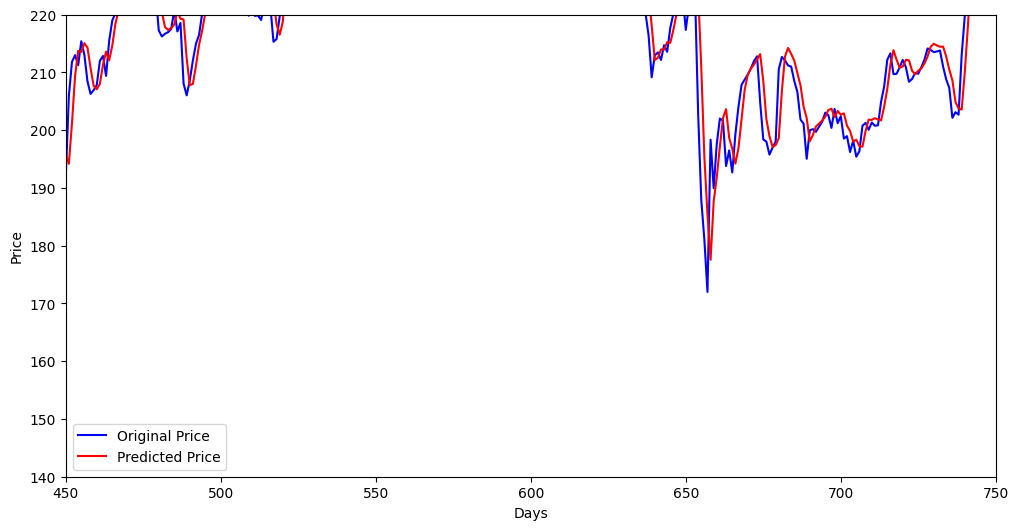

In [80]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450,750)
plt.ylim(140,220)

(140.0, 220.0)

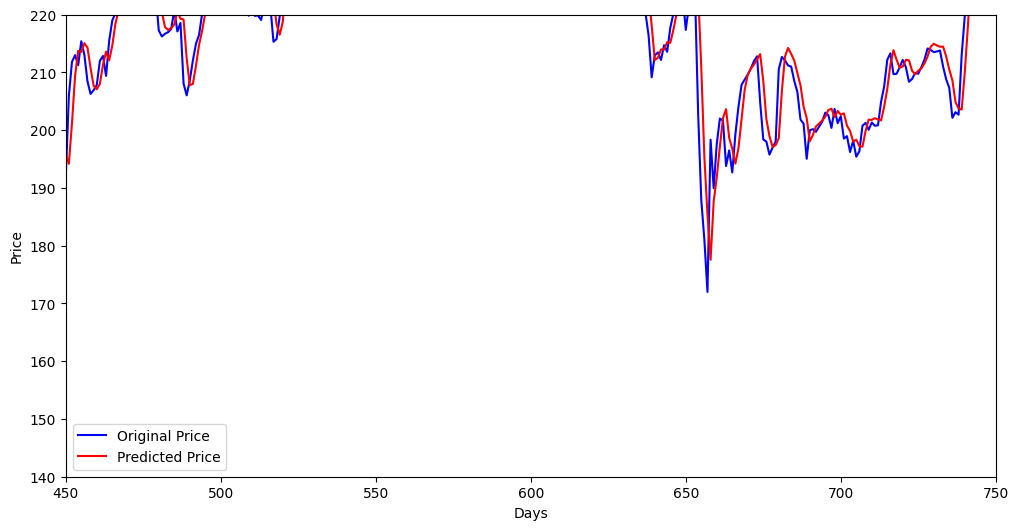

In [80]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450,750)
plt.ylim(140,220)

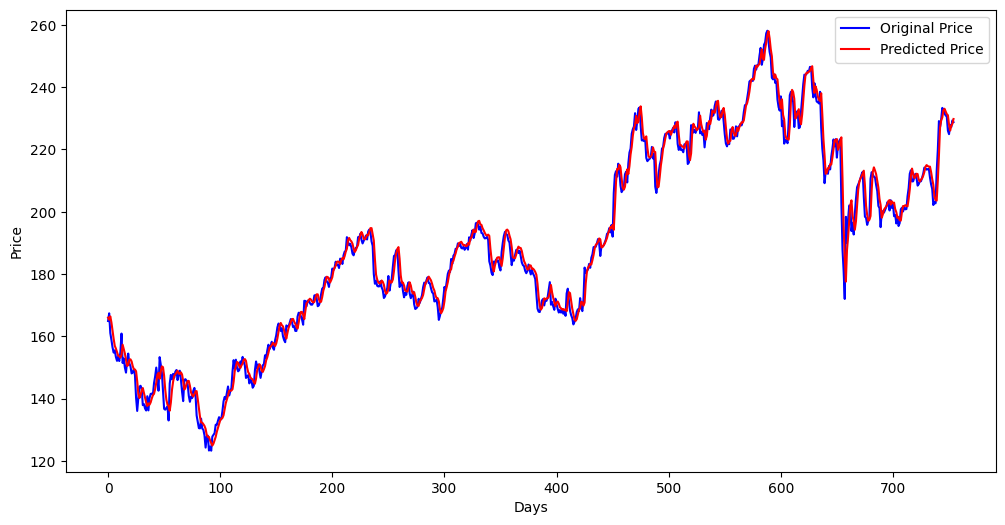

In [81]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

In [82]:
#MODEL Evalution

In [83]:
#Mean squared Error (mse)

In [92]:
from sklearn.metrics import mean_squared_error,r2_score

In [93]:
mse=mean_squared_error(y_test,y_predicted)
print(f"mean sqaured error (mse):{mse}")

mean sqaured error (mse):13.539695730449058


In [94]:
#root mean squared error(RMSE)

In [95]:
rmse=np.sqrt(mse)
print(f"root sqaured error (mse):{rmse}")

root sqaured error (mse):3.679632553727214


In [96]:
##R-squared

In [98]:
r2=r2_score(y_test,y_predicted)
print(f"R-squared:{r2}")

R-squared:0.9862566409416765
